Import the Dependencies

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib



Data Collection and Processing

In [55]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')



Checking the dataset

In [56]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
car_dataset.shape

(301, 9)

In [58]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [59]:
#checking the numsber of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [60]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding Categorical Data

In [61]:
# Encoding "fuel type data " Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace =True)

# Encoding "Seller  type data " Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace =True)

# Encoding "Transmission type data " Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace =True)


/tmp/ipython-input-61-3497497558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace =True)
/tmp/ipython-input-61-3497497558.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace =True)
/tmp/ipython-input-61-3497497558.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

In [62]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and target

In [63]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y =car_dataset['Selling_Price']

In [64]:
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [65]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training data and Test data

In [66]:
X_train,X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

1. Linear Regression


In [67]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [68]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [69]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [70]:
# R suare Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8799451660493711


Visualize the actual prices and Predicted price

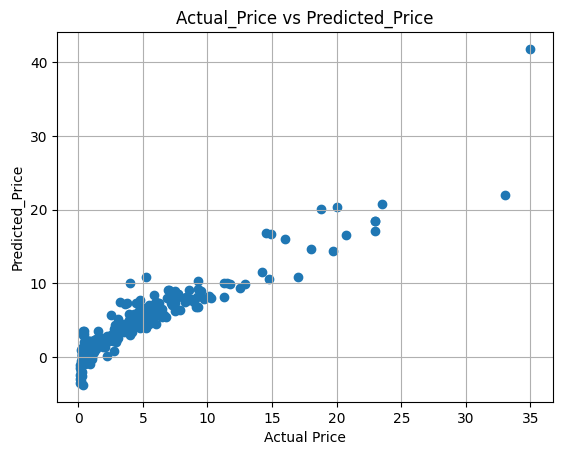

In [71]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted_Price")
plt.title("Actual_Price vs Predicted_Price")
plt.grid(True)
plt.show()

In [72]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [73]:
# R suare Error for test data
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8365766715027051


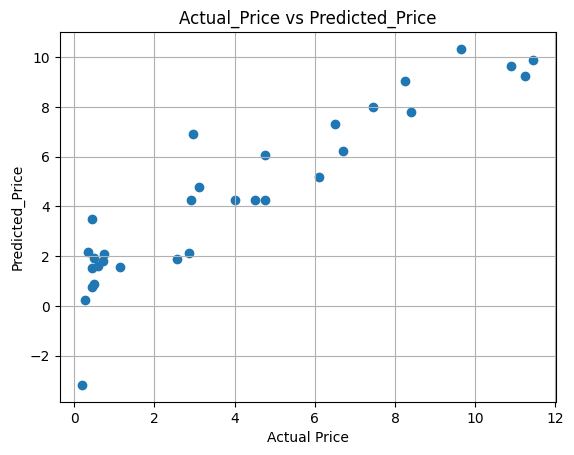

In [74]:
# plotting the test data
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted_Price")
plt.title("Actual_Price vs Predicted_Price")
plt.grid(True)
plt.show()

In [78]:
friends_car = np.array([
    [2012, 6.98, 130000,	1,	1,	0, 1],
    [2014, 6.98, 150000,	1,	1,	0, 1],
    [2015, 6.18, 120000,	1,	1,	0, 1]])

friends_car_df = pd.DataFrame(friends_car, columns=X.columns)
prediction = lin_reg_model.predict(friends_car_df)
# print(prediction)
print("The predictions are as follows: ")
for j,i in enumerate(prediction):
  print(f'The selling price for the {j+1} car is {i:.3} Lakh')

The predictions are as follows: 
The selling price for the 1 car is 2.82 Lakh
The selling price for the 2 car is 3.51 Lakh
The selling price for the 3 car is 3.77 Lakh


In [80]:
# save model
joblib.dump(lin_reg_model,"linear_regression_car_price")

['linear_regression_car_price']